## AIMS
1. To analyse historical data from ACLED on conflicts and crimes.
2. To employ statistical and machine learning methods for predictive modelling.
3. To develop dynamic visualisation using Python Matplotlib library to visualise forecasted probabilities for better interpretation.


## Expected Outcome
1. Identification of critical factors contributing to crime.
2. Predictive model with high accuracy capable of forecasting crime probability.
3. Visualisation using Matplotlib for ease of grasping insights and projected events.

## Import and install the necessary libraries

In [1]:
#!pip install openpyxl

In [2]:
#!pip install plotly

In [3]:
#!pip install WordCloud

In [4]:
#!pip install nltk

In [5]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk



import warnings
warnings.filterwarnings('ignore')

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D60E-E1FE

 Directory of C:\Users\USWER\Desktop\Hamoye 2024 Spring\Premiere project

23/05/2024  22:00    <DIR>          .
01/05/2024  02:52    <DIR>          ..
22/05/2024  03:13    <DIR>          .ipynb_checkpoints
09/05/2024  09:30         4,538,989 acled-4013d8b9-6dfa-40f7-9cee-73d2ac915ebf.zip
17/05/2024  06:31         3,246,084 acled-all-africa-file-20170101-to-date-xlsx-2.xls
21/05/2024  23:58         3,241,163 acled-dataset.xlsx
09/05/2024  09:17            75,934 Deep L Hamoye Project Proposal.pdf
23/05/2024  22:00           744,906 Matplotlib Premiere Project.ipynb
22/05/2024  03:13         7,424,490 Matplotlib_project.ipynb
09/05/2024  17:25            23,824 Rough Draft Project Proposal (Matplotlib) 9th.docx
09/05/2024  09:18            24,021 Rough Draft Project Proposal (Matplotlib).docx
               8 File(s)     19,319,411 bytes
               3 Dir(s)  172,554,719,232 bytes free


In [7]:
conflicts = pd.read_excel("acled-dataset.xlsx")

In [8]:
conflicts.head()

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
0,615,11879RTA,NaN,1997-01-01,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Tipaza,Douaouda,NaN,Douaouda,36.67250,2.7894,1,www.algeria-watch.org,5 January: Beheading of 5 citizens in Douaouda...,5
1,615,11880RTA,NaN,1997-01-02,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Relizane,Mazouna,NaN,Hassasna,36.13330,0.8833,1,www.algeria-watch.org,Two citizens were beheaded in Hassasna.,2
2,615,11881RTA,NaN,1997-01-03,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Alger,Sidi MHamed,NaN,Algiers,36.75250,3.04197,3,www.algeria-watch.org,Two citizens were killed in a raid on the vill...,2
3,615,11882RTA,NaN,1997-01-06,1997,1,Battle-No change of territory,Police Forces of Algeria (1994-1999),NaN,1,...,Alger,Cheraga,NaN,Ain Benian,36.80277,2.92185,1,www.algeria-watch.org,4 armed men were killed by security forces in ...,4
4,615,11883RTA,NaN,1997-01-07,1997,1,Battle-No change of territory,Military Forces of Algeria (1994-1999),NaN,1,...,Tipaza,Douaouda,NaN,Douaouda,36.67250,2.7894,1,www.algeria-watch.org,Clashes between the military and militants in ...,0


In [9]:
conflicts.shape

(14967, 25)

In [10]:
conflicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GWNO              14967 non-null  int64         
 1   EVENT_ID_CNTY     14967 non-null  object        
 2   EVENT_ID_NO_CNTY  0 non-null      float64       
 3   EVENT_DATE        14967 non-null  datetime64[ns]
 4   YEAR              14967 non-null  int64         
 5   TIME_PRECISION    14967 non-null  int64         
 6   EVENT_TYPE        14967 non-null  object        
 7   ACTOR1            14967 non-null  object        
 8   ALLY_ACTOR_1      2690 non-null   object        
 9   INTER1            14967 non-null  int64         
 10  ACTOR2            10383 non-null  object        
 11  ALLY_ACTOR_2      1854 non-null   object        
 12  INTER2            14967 non-null  int64         
 13  INTERACTION       14967 non-null  int64         
 14  COUNTRY           1496

In [11]:
conflicts.isnull().sum()

GWNO                    0
EVENT_ID_CNTY           0
EVENT_ID_NO_CNTY    14967
EVENT_DATE              0
YEAR                    0
TIME_PRECISION          0
EVENT_TYPE              0
ACTOR1                  0
ALLY_ACTOR_1        12277
INTER1                  0
ACTOR2               4584
ALLY_ACTOR_2        13113
INTER2                  0
INTERACTION             0
COUNTRY                 0
ADMIN1                  0
ADMIN2                  3
ADMIN3               7791
LOCATION                0
LATITUDE                0
LONGITUDE               0
GEO_PRECISION           0
SOURCE                  0
NOTES                   0
FATALITIES              0
dtype: int64

In [12]:
conflicts['ADMIN2']

0           Douaouda
1            Mazouna
2        Sidi MHamed
3            Cheraga
4           Douaouda
            ...     
14962         Harare
14963         Harare
14964          Gweru
14965         Harare
14966         Mazowe
Name: ADMIN2, Length: 14967, dtype: object

In [13]:
#fix the NaN values by dropping 5 columns and filling 3 NaN values in ADMIN 2 column with the mode of the column.
conflicts.drop(['ADMIN3','ALLY_ACTOR_2','ALLY_ACTOR_1','ACTOR2','EVENT_ID_NO_CNTY'], axis=1, inplace=True)
conflicts['ADMIN2'] = conflicts['ADMIN2'].fillna(conflicts['ADMIN2'].mode()[0])

In [14]:
conflicts.isnull().sum()

GWNO              0
EVENT_ID_CNTY     0
EVENT_DATE        0
YEAR              0
TIME_PRECISION    0
EVENT_TYPE        0
ACTOR1            0
INTER1            0
INTER2            0
INTERACTION       0
COUNTRY           0
ADMIN1            0
ADMIN2            0
LOCATION          0
LATITUDE          0
LONGITUDE         0
GEO_PRECISION     0
SOURCE            0
NOTES             0
FATALITIES        0
dtype: int64

In [15]:
conflicts.drop(['GWNO','EVENT_ID_CNTY', 'SOURCE'], axis=1, inplace=True)

In [16]:
conflicts.head()

,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,NOTES,FATALITIES
0,1997-01-01,1997,1,Violence against civilians,GIA: Armed Islamic Group,2,7,27,Algeria,Tipaza,Douaouda,Douaouda,36.67250,2.7894,1,5 January: Beheading of 5 citizens in Douaouda...,5
1,1997-01-02,1997,1,Violence against civilians,GIA: Armed Islamic Group,2,7,27,Algeria,Relizane,Mazouna,Hassasna,36.13330,0.8833,1,Two citizens were beheaded in Hassasna.,2
2,1997-01-03,1997,1,Violence against civilians,GIA: Armed Islamic Group,2,7,27,Algeria,Alger,Sidi MHamed,Algiers,36.75250,3.04197,3,Two citizens were killed in a raid on the vill...,2
3,1997-01-06,1997,1,Battle-No change of territory,Police Forces of Algeria (1994-1999),1,2,12,Algeria,Alger,Cheraga,Ain Benian,36.80277,2.92185,1,4 armed men were killed by security forces in ...,4
4,1997-01-07,1997,1,Battle-No change of territory,Military Forces of Algeria (1994-1999),1,2,12,Algeria,Tipaza,Douaouda,Douaouda,36.67250,2.7894,1,Clashes between the military and militants in ...,0


In [17]:
conflicts.describe()

,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,GEO_PRECISION,FATALITIES
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,2016.588695,1.108773,3.725663,3.004142,34.916951,8.142808,1.262444,1.773769
std,2.245491,0.362895,2.031352,2.906142,18.490781,16.734735,0.515503,8.184953
min,1997.000000,1.000000,1.000000,0.000000,10.000000,-34.409111,1.000000,0.000000
25%,2017.000000,1.000000,2.000000,0.000000,15.000000,0.517200,1.000000,0.000000
50%,2017.000000,1.000000,3.000000,2.000000,37.000000,6.769240,1.000000,0.000000
75%,2017.000000,1.000000,6.000000,7.000000,50.000000,14.222300,1.000000,1.000000
max,2017.000000,3.000000,8.000000,8.000000,80.000000,37.274420,3.000000,404.000000


In [18]:
"""# Strip the LONGITUDE column
conflicts['LONGITUDE'] = conflicts['LONGITUDE'].str.strip()

# Convert the LONGITUDE column from string to float
conflicts['LONGITUDE'] = pd.to_numeric(conflicts['LONGITUDE'])"""

"# Strip the LONGITUDE column\nconflicts['LONGITUDE'] = conflicts['LONGITUDE'].str.strip()\n\n# Convert the LONGITUDE column from string to float\nconflicts['LONGITUDE'] = pd.to_numeric(conflicts['LONGITUDE'])"

In [19]:
conflicts['LONGITUDE'].dtype

dtype('O')

In [20]:
conflicts.columns

Index(['EVENT_DATE', 'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1',
       'INTER1', 'INTER2', 'INTERACTION', 'COUNTRY', 'ADMIN1', 'ADMIN2',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'NOTES',
       'FATALITIES'],
      dtype='object')

In [21]:
conflicts['EVENT_TYPE'].unique()
#Violence against civilians, Battle-No change of territory, Remote violence appear 2X and need to be merged by renaming

array(['Violence against civilians', 'Battle-No change of territory',
       'Remote violence', 'Riots/Protests', 'Strategic development',
       'Battle-no change of territory',
       'Battle-Non-state actor overtakes territory',
       'Headquarters or base established',
       'Non-violent transfer of territory',
       'Battle-Government regains territory', 'Remote Violence',
       'Violence Against Civilians'], dtype=object)

In [22]:
# Define a dictionary mapping old values to new values
rename_mapping = {
    'Violence Against Civilians': 'Violence against civilians',
    'Battle-No change of territory': 'Battle-no change of territory',
    'Remote Violence': 'Remote violence'
}

# Replace recurring/duplicate values in  EVENT_TYPE column
conflicts['EVENT_TYPE'] = conflicts['EVENT_TYPE'].replace(rename_mapping)

# Check the unique values again to ensure consistency
unique_event_types = conflicts['EVENT_TYPE'].unique()
print(unique_event_types)

['Violence against civilians' 'Battle-no change of territory'
 'Remote violence' 'Riots/Protests' 'Strategic development'
 'Battle-Non-state actor overtakes territory'
 'Headquarters or base established' 'Non-violent transfer of territory'
 'Battle-Government regains territory']


### Group Fatalities by Event Type

In [23]:
fatalities_per_event_type = conflicts.groupby(['EVENT_TYPE'])[['FATALITIES']].sum()

In [24]:
fatalities_per_event_type.sort_values(by=['FATALITIES'], axis=0, ascending=False)

,FATALITIES
EVENT_TYPE,
Battle-no change of territory,12489
Violence against civilians,8322
Remote violence,3228
Battle-Government regains territory,921
Battle-Non-state actor overtakes territory,876
Riots/Protests,490
Strategic development,222
Headquarters or base established,0
Non-violent transfer of territory,0


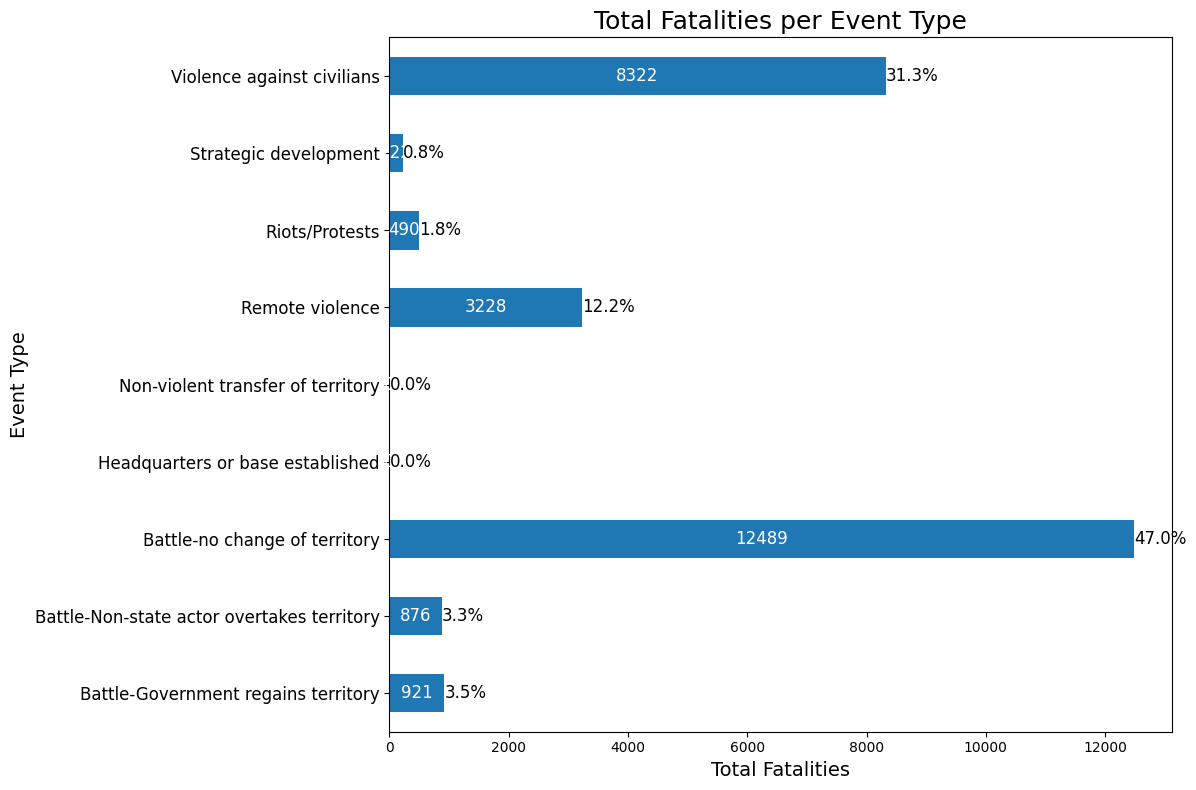

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
bars = fatalities_per_event_type.plot(kind='barh', ax=ax, legend=False)

plt.title('Total Fatalities per Event Type', fontsize=18)
plt.ylabel('Event Type', fontsize=14)
plt.xlabel('Total Fatalities', fontsize=14)
plt.yticks(fontsize=12)

total = fatalities_per_event_type['FATALITIES'].sum()  # Total number of fatalities

# Add annotations
for bar in ax.patches:
    width = bar.get_width()  # Get the width of the bar (number of fatalities)
    percentage = 100 * width / total  # Calculate the percentage
    x = bar.get_x() + width  # x position of the text
    y = bar.get_y() + bar.get_height() / 2  # y position of the text
    
    # Add the number inside the bar
    ax.text(width / 2, y, f'{int(width)}', ha='center', va='center', color='white', fontsize=12)
    
    # Add the percentage above the bar
    ax.text(x + 5, y, f'{percentage:.1f}%', ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [26]:
conflicts

,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,NOTES,FATALITIES
0,1997-01-01,1997,1,Violence against civilians,GIA: Armed Islamic Group,2,7,27,Algeria,Tipaza,Douaouda,Douaouda,36.67250,2.7894,1,5 January: Beheading of 5 citizens in Douaouda...,5
1,1997-01-02,1997,1,Violence against civilians,GIA: Armed Islamic Group,2,7,27,Algeria,Relizane,Mazouna,Hassasna,36.13330,0.8833,1,Two citizens were beheaded in Hassasna.,2
2,1997-01-03,1997,1,Violence against civilians,GIA: Armed Islamic Group,2,7,27,Algeria,Alger,Sidi MHamed,Algiers,36.75250,3.04197,3,Two citizens were killed in a raid on the vill...,2
3,1997-01-06,1997,1,Battle-no change of territory,Police Forces of Algeria (1994-1999),1,2,12,Algeria,Alger,Cheraga,Ain Benian,36.80277,2.92185,1,4 armed men were killed by security forces in ...,4
4,1997-01-07,1997,1,Battle-no change of territory,Military Forces of Algeria (1994-1999),1,2,12,Algeria,Tipaza,Douaouda,Douaouda,36.67250,2.7894,1,Clashes between the military and militants in ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,2017-10-31,2017,1,Riots/Protests,Rioters (Zimbabwe),5,1,15,Zimbabwe,Harare,Harare,Harare,-17.83330,31.05,1,The police attempted to block a Vendors' Union...,0
14963,2017-10-31,2017,1,Riots/Protests,Rioters (Zimbabwe),5,0,50,Zimbabwe,Harare,Harare,Harare,-17.83330,31.05,1,"Jah Prayzah, a musician believed to be aligned...",0
14964,2017-10-31,2017,1,Riots/Protests,Rioters (Zimbabwe),5,1,15,Zimbabwe,Midlands,Gweru,Gweru,-19.45000,29.82,1,There were running battles between the police ...,0
14965,2017-11-01,2017,2,Riots/Protests,Protesters (Zimbabwe),6,0,60,Zimbabwe,Harare,Harare,Chitungwiza,-18.01274,31.07555,1,Hundreds of Seventh Day Adventist youths march...,0


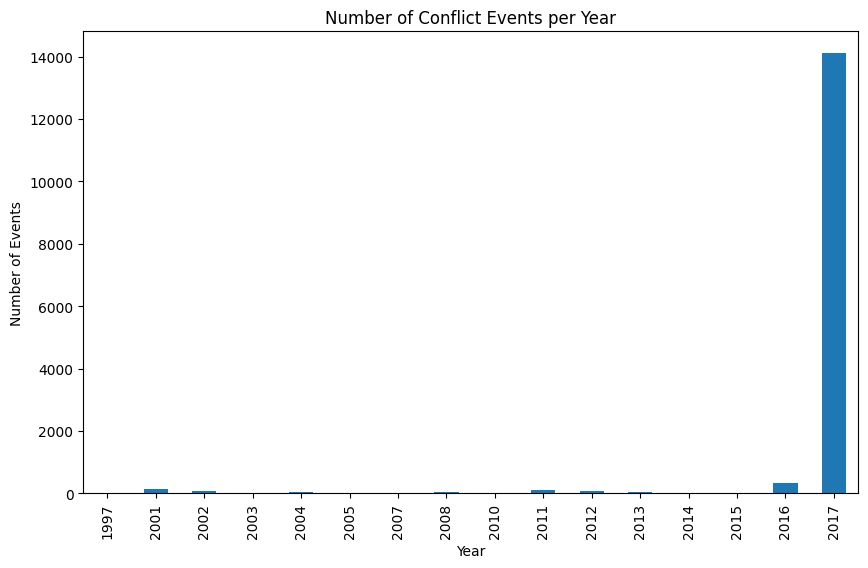

In [27]:
# Convert EVENT_DATE to datetime
conflicts['EVENT_DATE'] = pd.to_datetime(conflicts['EVENT_DATE'], errors='coerce')

# Question 1: What is the distribution of conflict events over time (YEAR, EVENT_DATE)?
events_per_year = conflicts.groupby('YEAR').size()
plt.figure(figsize=(10, 6))
events_per_year.plot(kind='bar')
plt.title('Number of Conflict Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

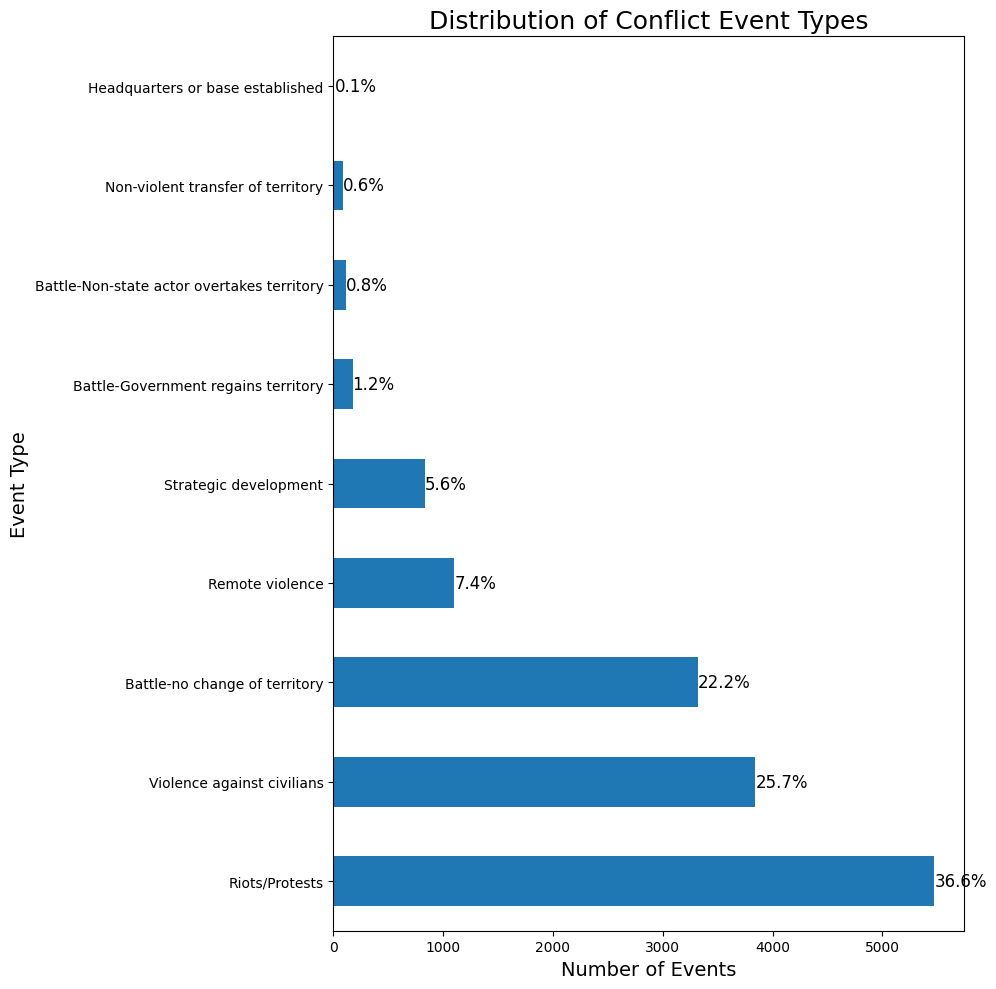

In [28]:
# Question 2: What conflict events are most common (EVENT_TYPE)?

# Calculate event type counts
event_type_counts = conflicts['EVENT_TYPE'].value_counts()

# Create the plot
plt.figure(figsize=(10, 10))
bars = event_type_counts.plot(kind='barh')

plt.title('Distribution of Conflict Event Types', fontsize=18)
plt.xlabel('Number of Events', fontsize=14)
plt.ylabel('Event Type', fontsize=14)
plt.xticks(rotation=0)

total_events = event_type_counts.sum()  # Total number of events

# Add annotations
for bar in bars.patches:
    width = bar.get_width()  # Get the width of the bar (number of events)
    percentage = 100 * width / total_events  # Calculate the percentage
    x = bar.get_x() + width  # x position of the text
    y = bar.get_y() + bar.get_height() / 2  # y position of the text
    
    # Add the number inside the bar
    plt.text(width, y, f'{int(width)}', ha='left', va='center', color='white', fontsize=12)
    
    # Add the percentage above the bar
    plt.text(x, y, f'{percentage:.1f}%', ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [29]:
conflicts.columns

Index(['EVENT_DATE', 'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1',
       'INTER1', 'INTER2', 'INTERACTION', 'COUNTRY', 'ADMIN1', 'ADMIN2',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'NOTES',
       'FATALITIES'],
      dtype='object')

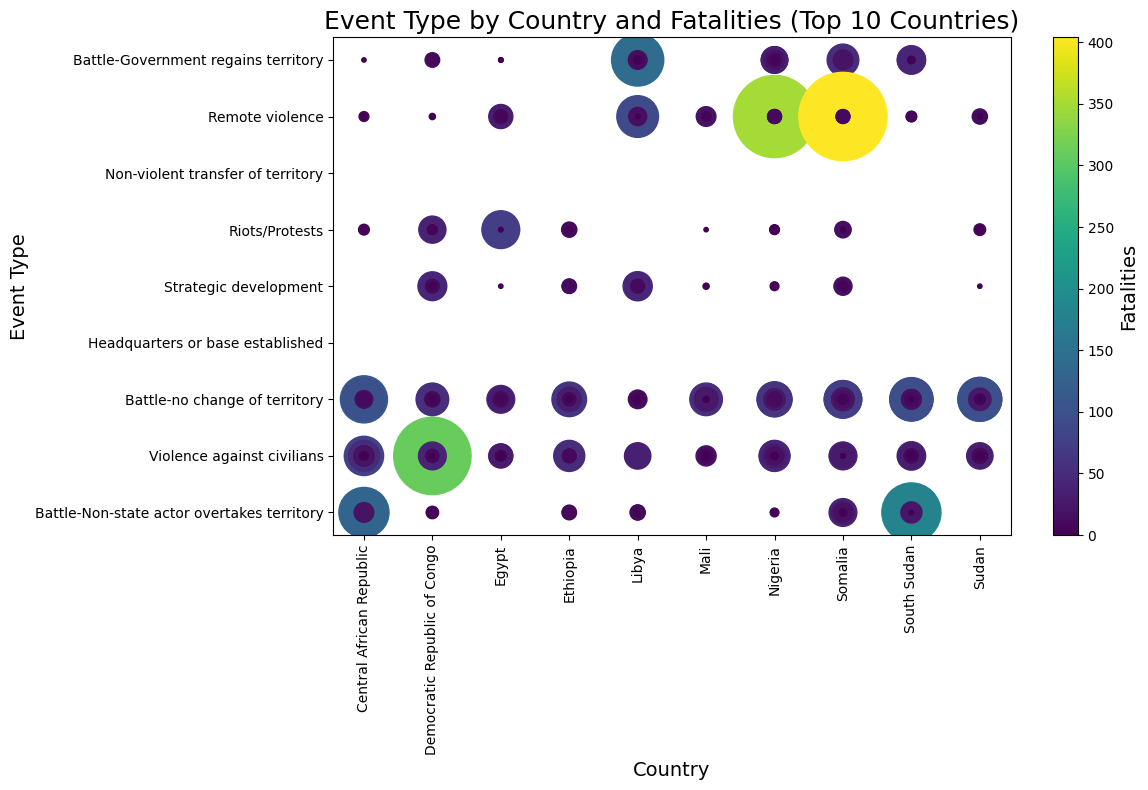

In [30]:
# Group by country and calculate total fatalities
country_fatalities = conflicts.groupby('COUNTRY')['FATALITIES'].sum()

# Select top 10 countries with the most fatalities
top_countries = country_fatalities.nlargest(10)

# Filter conflicts data for the top 10 countries
top_conflicts = conflicts[conflicts['COUNTRY'].isin(top_countries.index)]

# Define the size of the plot
plt.figure(figsize=(12, 8))

scatter = plt.scatter(top_conflicts['COUNTRY'], top_conflicts['EVENT_TYPE'], s=top_conflicts['FATALITIES']*10, c=top_conflicts['FATALITIES'], cmap="viridis")

# Set plot title and labels
plt.title('Event Type by Country and Fatalities (Top 10 Countries)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Event Type', fontsize=14)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Fatalities', fontsize=14)

plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


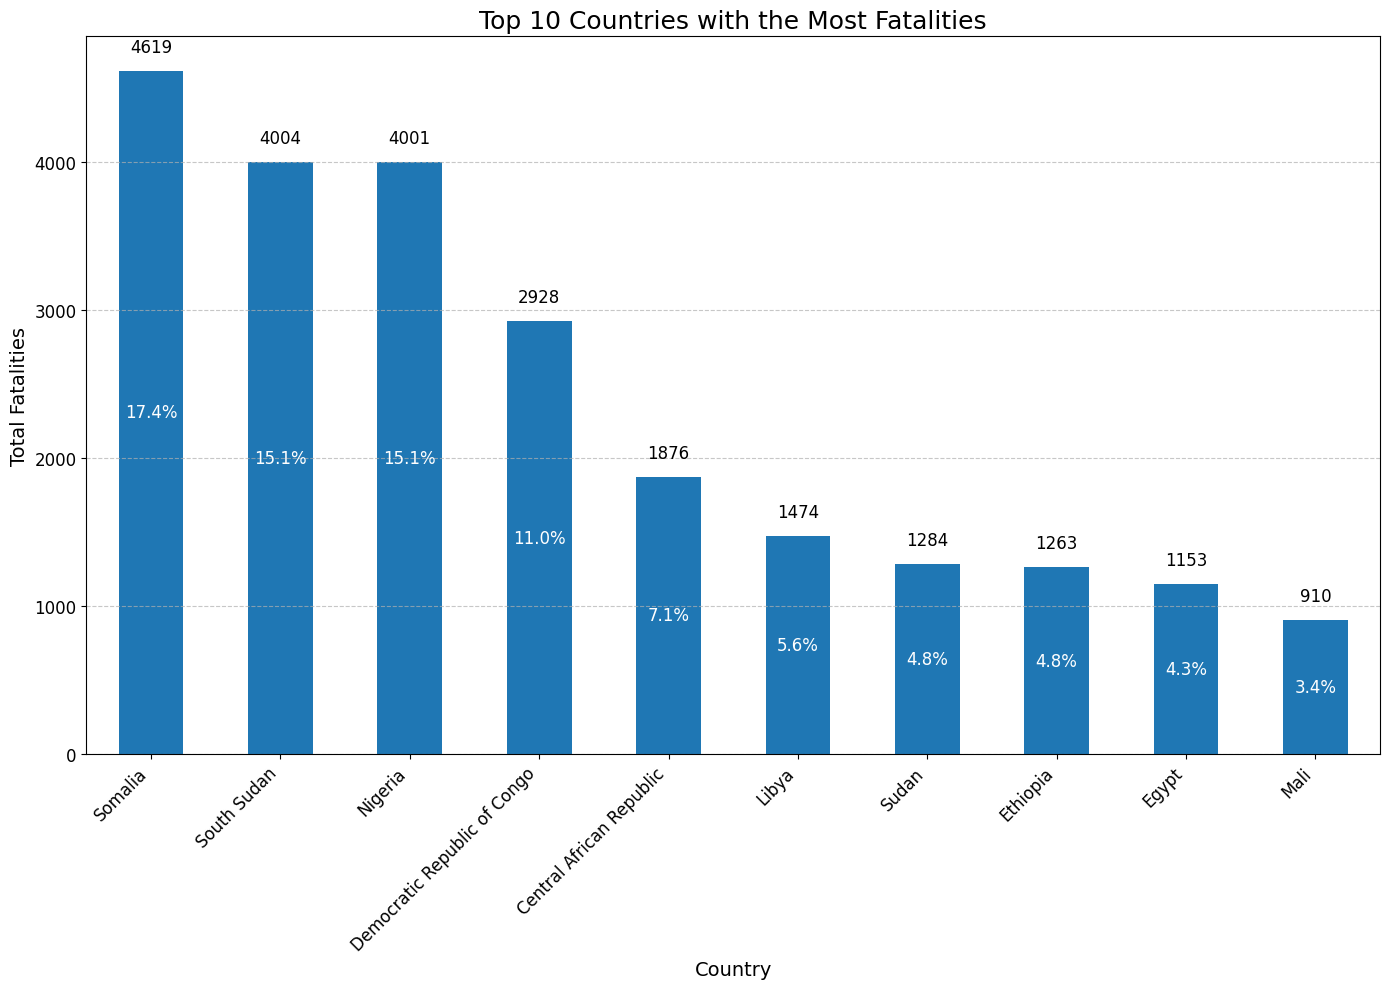

In [31]:
# Group by country and calculate total fatalities
country_fatalities = conflicts.groupby('COUNTRY')['FATALITIES'].sum()

# Select the top 10 countries with the most fatalities
top_countries = country_fatalities.nlargest(10)

# Plot
plt.figure(figsize=(14, 10))
bars = top_countries.plot(kind='bar')

plt.title('Top 10 Countries with the Most Fatalities', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Fatalities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
total_fatalities = country_fatalities.sum()
for bar in bars.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    
    # Add number of fatalities
    plt.text(x + width / 2, y + height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=12)
    
    # Add percentage of fatalities
    percentage = (height / total_fatalities) * 100
    plt.text(x + width / 2, y + height / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()


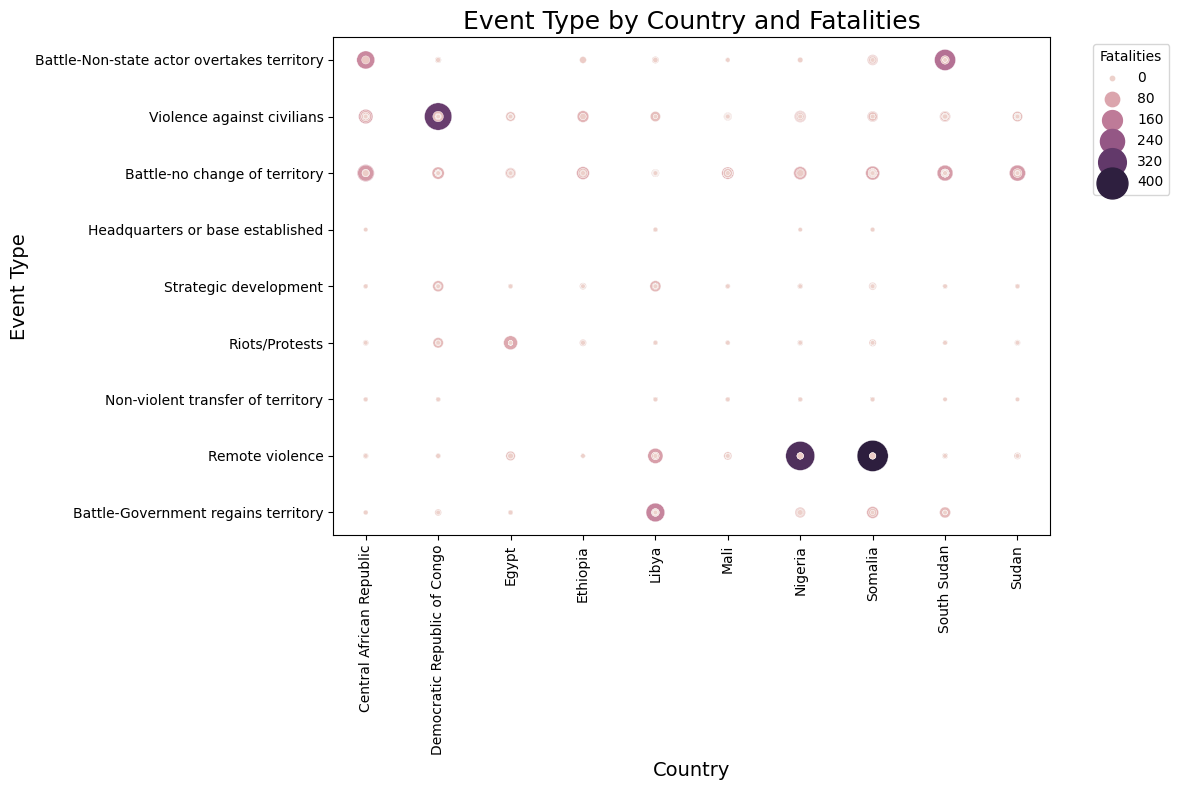

In [32]:
# Get the top 10 countries with the highest fatalities
top_countries = conflicts.groupby('COUNTRY')['FATALITIES'].sum().nlargest(10).index

# Filter the data to include only the top 10 countries
filtered_conflicts = conflicts[conflicts['COUNTRY'].isin(top_countries)]

# Define the size of the plot
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=filtered_conflicts, x='COUNTRY', y='EVENT_TYPE', size='FATALITIES', sizes=(10, 500), hue='FATALITIES')

# Set plot title and labels
plt.title('Event Type by Country and Fatalities', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Event Type', fontsize=14)

# Adjust legend
plt.legend(title='Fatalities', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


### Geo Mapping

Identify accidents in Nigeria. Run clustering. What do the clusters reveal about the distribution of accidents in Nigeria?

In [33]:
#Feature selection for KMeans
#Extract data for Nigeria
nigeria = conflicts[conflicts['COUNTRY']== 'Nigeria']
nigeria

,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,NOTES,FATALITIES
7064,2005-06-08,2005,1,Violence against civilians,Police Forces of Nigeria (2015-),1,7,17,Nigeria,Federal Capital Territory,Abuja Municipality,Abuja,9.083333,7.533333,1,Six traders are extra-judicially killed by six...,6
7065,2016-10-17,2016,1,Battle-no change of territory,Military Forces of Nigeria (2015-),1,2,12,Nigeria,Borno,Mobbar,Gashager,13.369013,12.785775,1,Boko Haram attacked a joint military position ...,20
7066,2017-01-01,2017,1,Violence against civilians,Unidentified Armed Group (Nigeria),3,7,37,Nigeria,Lagos,Ikorodu,Ikorodu,6.615483,3.508673,1,Unidentified gunmen shoot and kill three and i...,3
7067,2017-01-01,2017,1,Strategic development,Boko Haram - Wilayat Gharb Ifriqiyyah,2,0,20,Nigeria,Borno,Maiduguri,Maiduguri,11.846441,13.160274,1,A suspected Boko Haram suicide bomber detonate...,1
7068,2017-01-02,2017,1,Remote violence,Military Forces of Nigeria (2015-),1,2,12,Nigeria,Borno,Konduga,Adzunge,11.473372,13.352053,1,Military forces carry out a bombardment on [th...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,2017-11-03,2017,1,Riots/Protests,Protesters (Nigeria),6,0,60,Nigeria,Oyo,Akinyele,Ibadan,7.433330,3.91667,1,Oyo State workers strike and protest in Ibadan...,0
8431,2017-11-03,2017,1,Riots/Protests,Protesters (Nigeria),6,0,60,Nigeria,Oyo,Ibarapa East,Lalate,7.600000,3.45,1,Oyo State workers strike and protest in Ibadan...,0
8432,2017-11-03,2017,1,Riots/Protests,Protesters (Nigeria),6,0,60,Nigeria,Oyo,Oyo West,Oyo,7.850000,3.93333,1,Oyo State workers strike and protest in Ibadan...,0
8433,2017-11-03,2017,1,Strategic development,NDA: Niger Delta Avengers,3,0,30,Nigeria,Federal Capital Territory,Abuja Municipality,Abuja,9.083333,7.533333,3,The NDA announces an end to a ceasefire agreem...,0


In [34]:
#create a new df to contain longitude and latitude for the whle continent 
geo_cord = conflicts[['LONGITUDE', 'LATITUDE']]
geo_cord

,LONGITUDE,LATITUDE
0,2.7894,36.67250
1,0.8833,36.13330
2,3.04197,36.75250
3,2.92185,36.80277
4,2.7894,36.67250
...,...,...
14962,31.05,-17.83330
14963,31.05,-17.83330
14964,29.82,-19.45000
14965,31.07555,-18.01274


In [35]:
#check for missing coordinates
missing_cord = geo_cord[geo_cord.isna().any(axis=1)]
missing_cord

,LONGITUDE,LATITUDE


In [36]:
nigeria_geo_cord = nigeria[['LONGITUDE', 'LATITUDE']]
nigeria_geo_cord

,LONGITUDE,LATITUDE
7064,7.533333,9.083333
7065,12.785775,13.369013
7066,3.508673,6.615483
7067,13.160274,11.846441
7068,13.352053,11.473372
...,...,...
8430,3.91667,7.433330
8431,3.45,7.600000
8432,3.93333,7.850000
8433,7.533333,9.083333


In [37]:
#Normalisation
scaler = StandardScaler()
geo_cord_scaled = scaler.fit_transform(geo_cord)
nigeria_geo_cord_scaled =  scaler.fit_transform(nigeria_geo_cord)

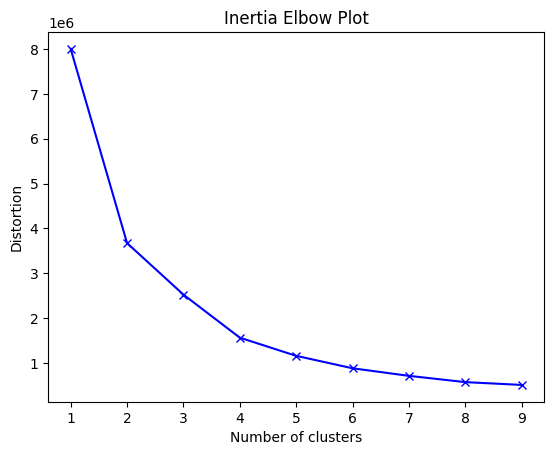

In [38]:
from sklearn.cluster import KMeans
distortions = []
K = range(1, 10)
for k in K:
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_cord)
    distortions.append((kmeans.inertia_))

plt.plot(K, distortions, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Inertia Elbow Plot")
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(geo_cord)

KMeans(n_clusters=5, random_state=42)

In [40]:
nigeria_labels = kmeans.predict(nigeria_geo_cord)
nigeria_labels

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
centroids = kmeans.cluster_centers_
centroid_points = len(centroids)
africa_labels = kmeans.predict(geo_cord)
africa_labels

array([3, 3, 3, ..., 1, 1, 1])

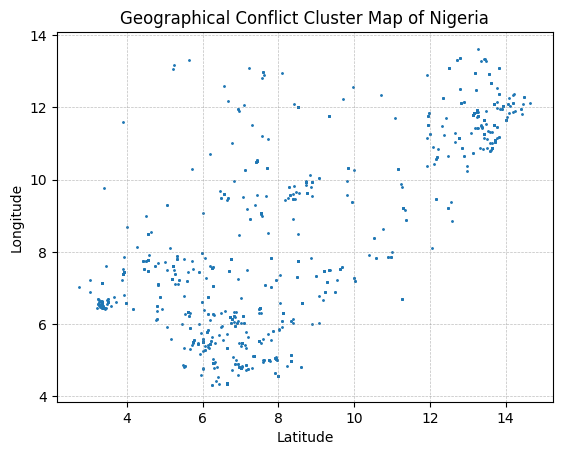

In [42]:
fig, axes = plt.subplots()
axes.scatter(nigeria_geo_cord['LONGITUDE'],nigeria_geo_cord['LATITUDE'],s=1.1)
#plt.scatter(centroids[:, 0], centroids[:, 1], color = 'orange')

# Add a faint grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)


plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographical Conflict Cluster Map of Nigeria')
plt.show()

In [43]:
nigeria_geo_cord['clusters'] = nigeria_labels
geo_cord['clusters'] = africa_labels

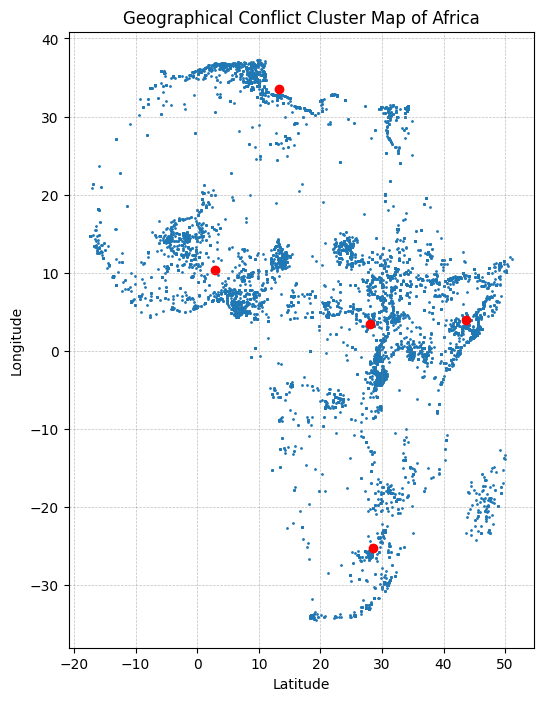

In [44]:
#plotting the attributes to see how they affect the clusters formed
fig= plt.figure(figsize= (6,8))
plt.scatter (geo_cord["LONGITUDE"], geo_cord["LATITUDE"], s=1)

plt.scatter(centroids[:,0], centroids[:,1], color = "red")

# Add a faint grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographical Conflict Cluster Map of Africa')
plt.show()

### Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USWER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


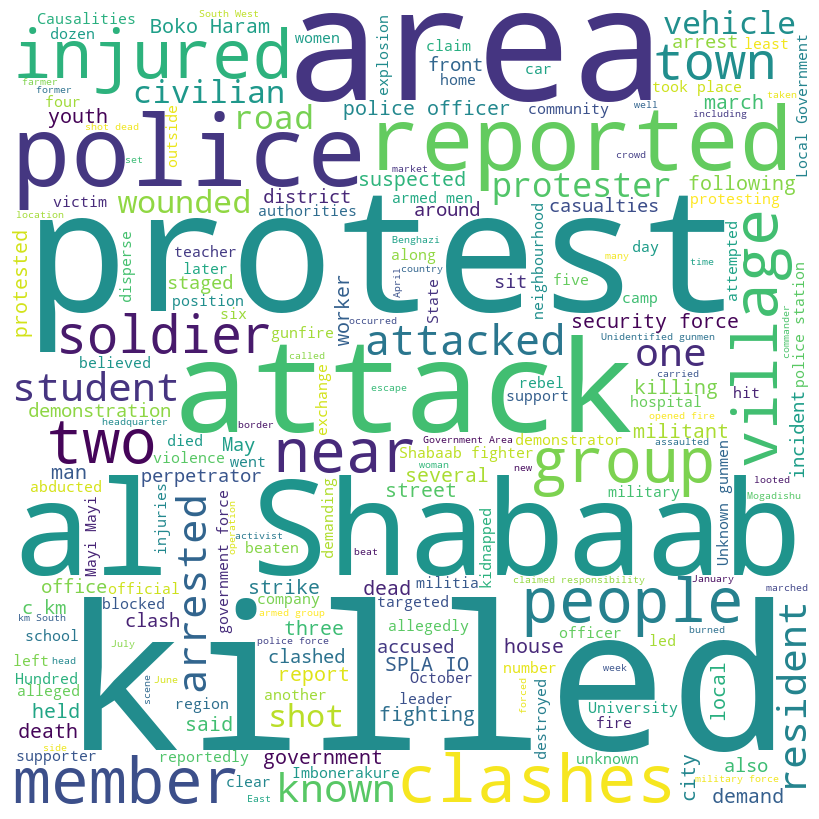

In [45]:
# Extract text from a particular column of the dataframe
text = ' '.join(conflicts['NOTES'].astype(str).tolist())

# Load stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Generate a wordcloud from the extracted text
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords).generate(text)

# Display the wordcloud using matplotlib
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## Modelling

In [46]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
conflicts.columns

Index(['EVENT_DATE', 'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1',
       'INTER1', 'INTER2', 'INTERACTION', 'COUNTRY', 'ADMIN1', 'ADMIN2',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'NOTES',
       'FATALITIES'],
      dtype='object')

In [48]:
#Feature Selection
X = conflicts[['EVENT_DATE', 'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1',
       'INTER1', 'INTER2', 'INTERACTION', 'COUNTRY', 'ADMIN1', 'ADMIN2',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'NOTES',
       'FATALITIES']]
y = (conflicts['FATALITIES'] > 0).astype(int) 

In [49]:
#Check if the data is balanced. Data is not balanced
y.value_counts()

0    9794
1    5173
Name: FATALITIES, dtype: int64

In [50]:
#!pip install imbalanced-learn

In [51]:
# Install Imblearn for the undersampled dataset
from imblearn.under_sampling import RandomUnderSampler

In [52]:
#Balalnce the target feature
conflicts_balanced, y_balanced = RandomUnderSampler().fit_resample(conflicts, y)

In [53]:
#check to see if the balncing has been completed
y_balanced.value_counts()

0    5173
1    5173
Name: FATALITIES, dtype: int64

In [57]:
conflicts_balanced= conflicts_balanced.drop(["EVENT_DATE"], axis =1)

In [58]:
conflicts_balanced = conflicts_balanced.select_dtypes(exclude='object')
conflicts_balanced

,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,GEO_PRECISION,FATALITIES
0,2017,1,4,4,44,8.251603,1,0
1,2017,1,5,0,50,-29.850000,1,0
2,2017,1,3,7,37,11.283660,1,0
3,2017,1,5,0,50,-29.328160,2,0
4,2017,1,2,7,27,11.036090,1,0
...,...,...,...,...,...,...,...,...
10341,2017,1,3,7,37,-17.833300,1,1
10342,2017,1,4,7,47,-18.966600,1,1
10343,2017,1,5,1,15,-17.833300,1,1
10344,2017,1,5,1,15,-18.983300,1,1


In [59]:
#select best features for the classification using selectkBest and initialise k to all
skb = SelectKBest(f_classif, k="all")

#fit skb to the data
skb.fit(conflicts_balanced, y_balanced)

SelectKBest(k='all')

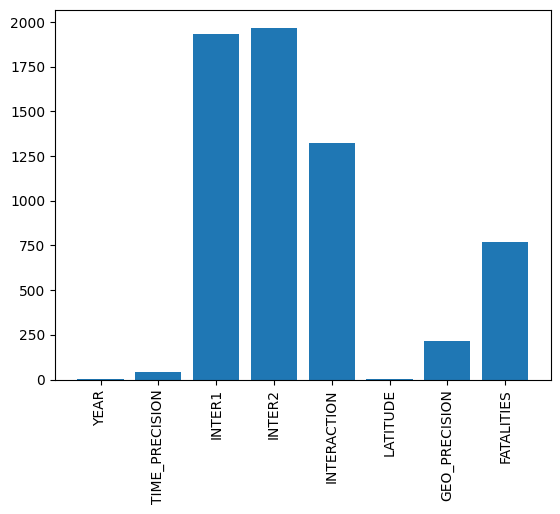

In [60]:
mk = skb.get_support()
feat =skb.feature_names_in_[mk]
scores = skb.scores_[mk]


#View the relevant columns through a plot
plt.bar(feat, scores)
plt.xticks(rotation ='vertical');

In [61]:
feat

array(['YEAR', 'TIME_PRECISION', 'INTER1', 'INTER2', 'INTERACTION',
       'LATITUDE', 'GEO_PRECISION', 'FATALITIES'], dtype=object)

### Feature Selection

In [64]:
#drop values not needed and select the features needed
X = conflicts_balanced
y = y_balanced

### Train Test Split

In [65]:
#Split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =  0.2, random_state = 42)

### Random Forest Classifier

In [67]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [69]:
#Fit the data
rfc.fit(X_train, y_train)

#Make prediction
rfc_pred = rfc.predict(X_test)

In [70]:
#Define function to be called for evaluation metrics
def model_evaluation(model, predictors, target, threshold=0.5):

    # Model prediction
    pred_proba = model.predict_proba(predictors)[:, 1]

    # Class predictions
    pred_class = np.round(pred_proba > threshold)

    # Compute evaluation metrics: accuracy, recall, precision, and F1-score
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class, average="weighted")
    precision = precision_score(target, pred_class, average="weighted")
    f1 = f1_score(target, pred_class, average="weighted")

    # Create a DataFrame of the metrics to show scores
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])

    # Plot the confusion matrix
    conf = confusion_matrix(target, pred_class)

    #make a heatmap of the confusion matrix
    sns.heatmap(conf, annot=True, fmt="g")
    plt.title("Confusion Matrix of the Random Forest Model Prediction")
    plt.xticks([0.5, 1.5], labels=["Predicted Non-Fatalities", "Predicted Fatalities"])
    plt.yticks([0.5, 1.5], labels=["Actual Non-Fatalities", "Actual Fatalities"])
    plt.figure(figsize=(15, 15))

    plt.show()

    return df_perf


In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

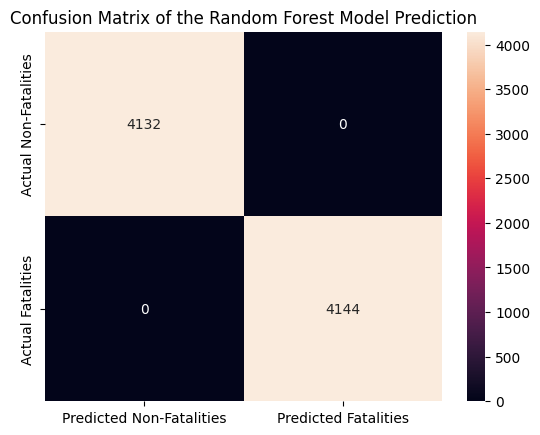

<Figure size 1500x1500 with 0 Axes>

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [74]:
model_evaluation(rfc, X_train, y_train)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00      1029

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

